In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [145]:
df = pd.read_csv('PM2.5_dataset.csv')
df = df.drop(columns = ('Unnamed: 0'))

In [146]:
df.head()

,station_id,stime,air_data_value,RH,UGRD,VGRD,HPBL,TMP,goes_measurement
0,06-011-0007,2019-01-02 20:00:00,17.0,31.600000,-2.106623,-1.797583,256.61905,282.8188,-0.005922
1,06-019-0500,2019-01-02 20:00:00,13.0,62.200000,1.205877,1.764917,337.49405,281.6313,0.087090
2,06-061-0003,2019-01-02 20:00:00,21.0,61.500000,1.518377,1.014917,270.61905,280.1313,0.094333
3,06-073-1201,2019-01-02 20:00:00,6.0,15.400001,2.080877,-1.610083,1009.30660,288.1938,-0.024185
4,06-079-2004,2019-01-02 20:00:00,7.0,50.700000,2.393377,-1.172583,460.43155,285.1938,-0.014013


In [147]:
len(df)

31570

In [148]:
df['PM_buckets'] = pd.cut(df['air_data_value'], bins = [0,15.5,40.5,65.5,150] , labels = [0,1,2,3])

In [149]:
df['air_data_value'].describe()

count    31570.000000
mean         7.948898
std          5.912331
min          2.000000
25%          4.000000
50%          6.500000
75%         10.000000
max         91.000000
Name: air_data_value, dtype: float64

In [150]:
len(df[df['air_data_value']>20])

986

In [151]:
df['TMP'] = df['TMP'] - 273

In [152]:
df['wind_speed'] = pd.Series(tf.sqrt(df['UGRD']*df['UGRD'] + df['VGRD']*df['VGRD']))

In [153]:
df[['air_data_value','RH','UGRD','VGRD','HPBL','TMP','goes_measurement','wind_speed']] = MinMaxScaler().fit_transform(df[['air_data_value','RH','UGRD','VGRD','HPBL','TMP','goes_measurement','wind_speed']])

In [154]:
df.head()

,station_id,stime,air_data_value,RH,UGRD,VGRD,HPBL,TMP,goes_measurement,PM_buckets,wind_speed
0,06-011-0007,2019-01-02 20:00:00,0.168539,0.297020,0.383178,0.486880,0.049162,0.433462,0.008728,1,0.157698
1,06-019-0500,2019-01-02 20:00:00,0.123596,0.611511,0.500428,0.608348,0.065926,0.416215,0.027147,0,0.121397
2,06-061-0003,2019-01-02 20:00:00,0.213483,0.604317,0.511489,0.582776,0.052064,0.394428,0.028581,1,0.103516
3,06-073-1201,2019-01-02 20:00:00,0.044944,0.130524,0.531399,0.493273,0.205179,0.511530,0.005112,0,0.149753
4,06-079-2004,2019-01-02 20:00:00,0.056180,0.493320,0.542461,0.508190,0.091408,0.467957,0.007126,0,0.151714


In [155]:
df.corr()

,air_data_value,RH,UGRD,VGRD,HPBL,TMP,goes_measurement,wind_speed
air_data_value,1.000000,0.210488,-0.071124,0.063130,-0.169982,0.175050,0.078573,0.022199
RH,0.210488,1.000000,-0.128554,-0.044413,-0.622456,-0.378534,0.311358,-0.202124
UGRD,-0.071124,-0.128554,1.000000,-0.097895,0.144502,-0.060262,-0.140061,0.352421
VGRD,0.063130,-0.044413,-0.097895,1.000000,0.113708,0.283796,0.061313,0.129670
HPBL,-0.169982,-0.622456,0.144502,0.113708,1.000000,0.436632,-0.106901,0.235042
TMP,0.175050,-0.378534,-0.060262,0.283796,0.436632,1.000000,-0.039949,0.206100
goes_measurement,0.078573,0.311358,-0.140061,0.061313,-0.106901,-0.039949,1.000000,-0.036660
wind_speed,0.022199,-0.202124,0.352421,0.129670,0.235042,0.206100,-0.036660,1.000000


In [156]:
df.groupby('station_id')['air_data_value'].sum()

station_id
06-011-0007    117.224719
06-019-0500     97.943820
06-027-0002      8.223596
06-029-0018     26.101124
06-037-9033     16.370787
                  ...    
49-035-4002     85.779775
56-013-0099      2.831461
56-013-0232      2.134831
56-035-0101      3.707865
56-039-1013      2.984270
Name: air_data_value, Length: 65, dtype: float64

In [157]:
df['air_data_value'].describe()

count    31570.000000
mean         0.066842
std          0.066431
min          0.000000
25%          0.022472
50%          0.050562
75%          0.089888
max          1.000000
Name: air_data_value, dtype: float64

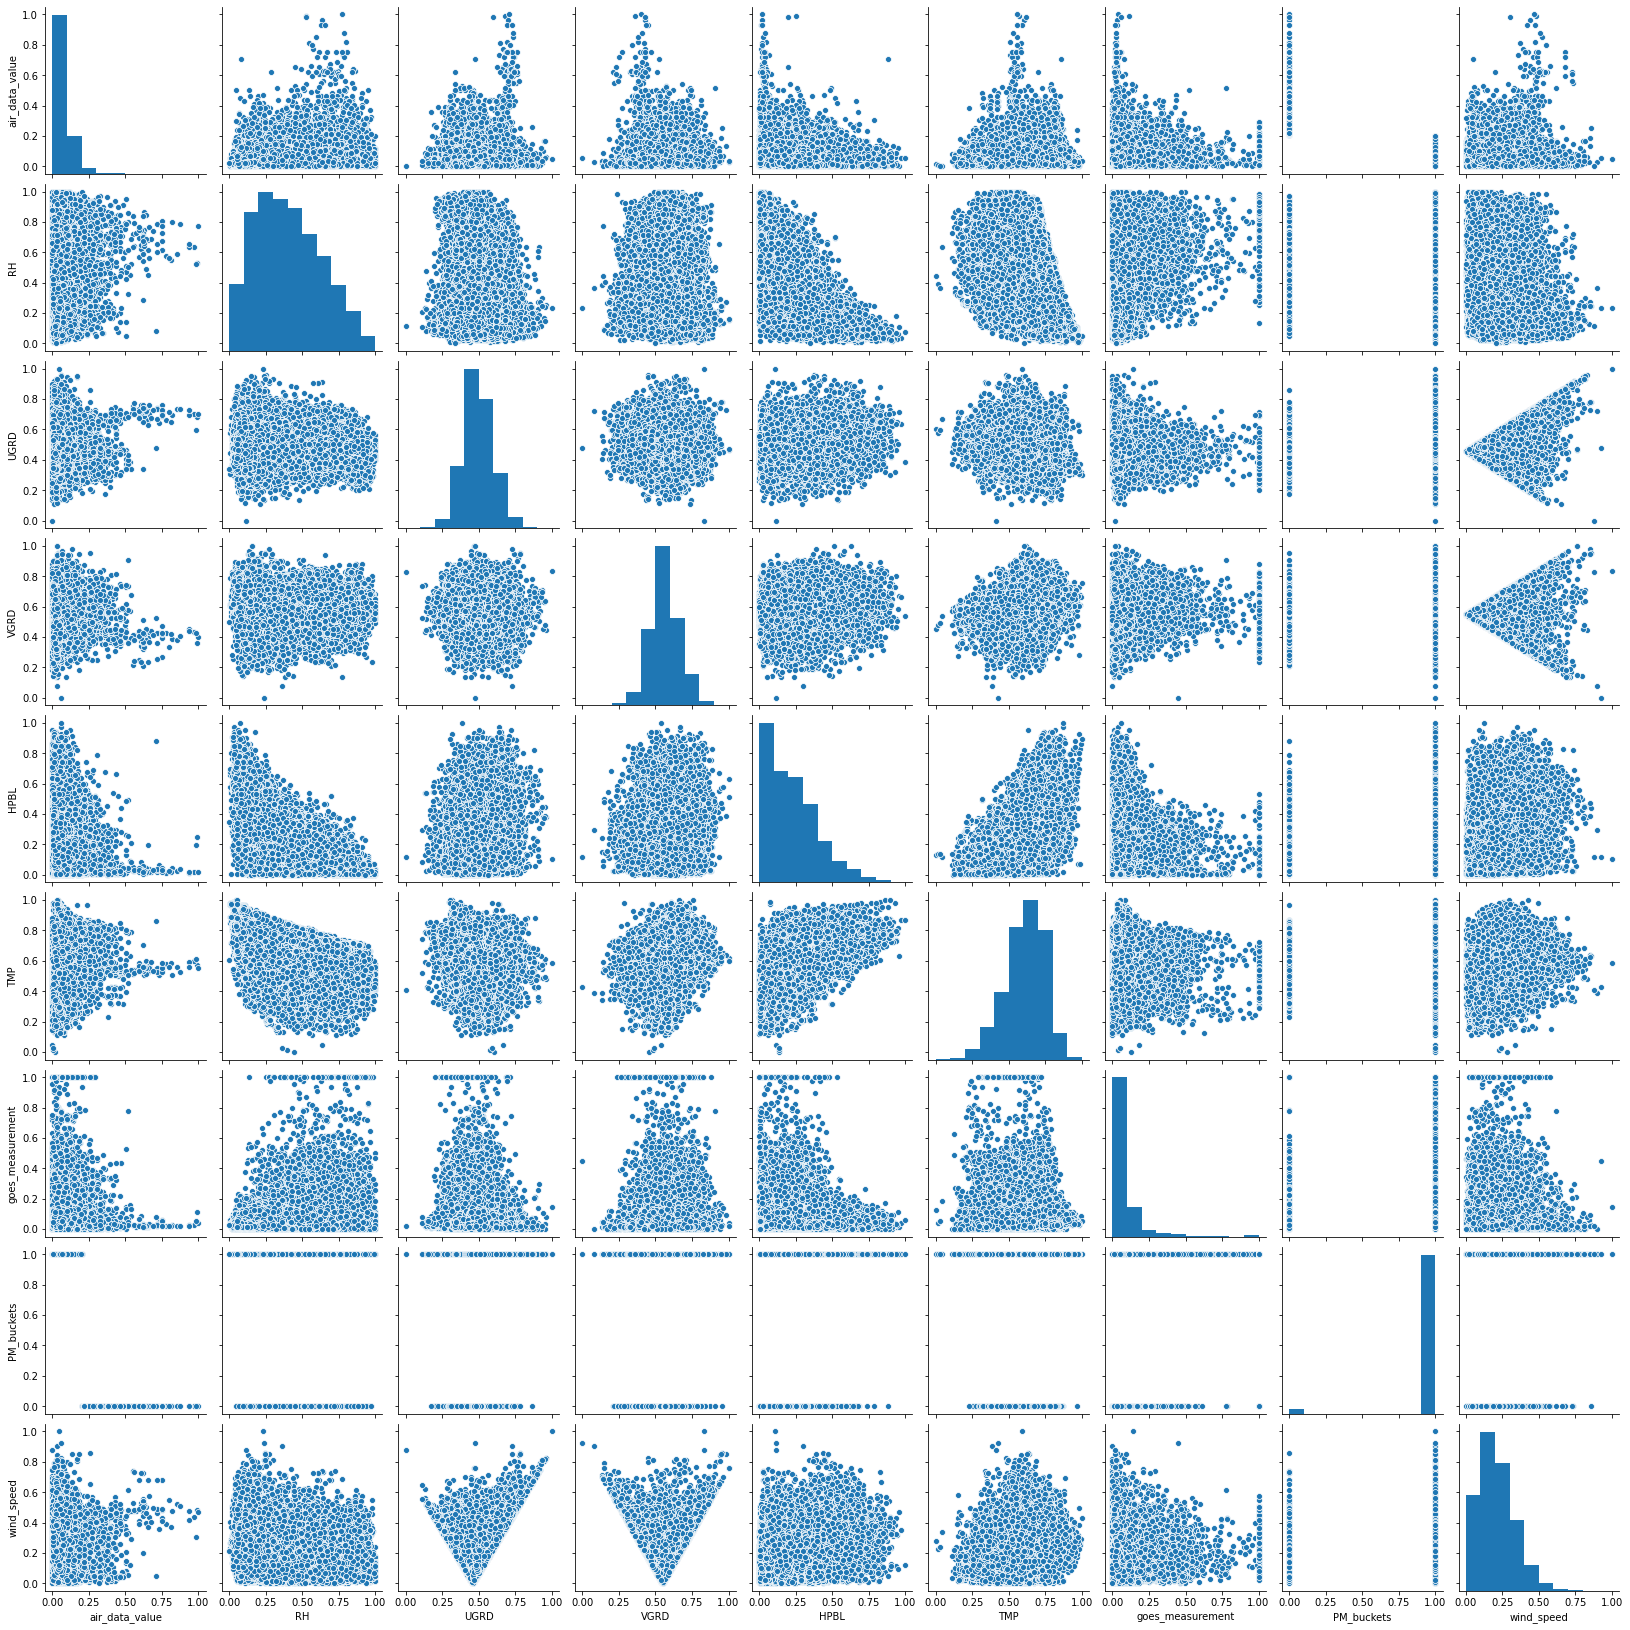

In [114]:
sns.pairplot(df)

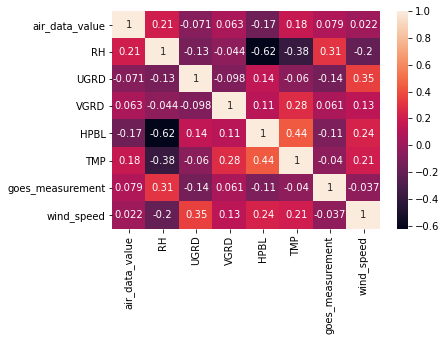

In [158]:
sns.heatmap(df.corr(),annot = True)

In [159]:
df = df.drop(columns = 'station_id')
df = df.drop(columns = 'stime')
df = df.drop(columns = 'UGRD')
df = df.drop(columns = 'VGRD')
df = df.drop(columns = 'air_data_value')

In [160]:
X = df.drop(columns = ('PM_buckets'))
y = df['PM_buckets']

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [162]:
X.head()

,RH,HPBL,TMP,goes_measurement,wind_speed
0,0.297020,0.049162,0.433462,0.008728,0.157698
1,0.611511,0.065926,0.416215,0.027147,0.121397
2,0.604317,0.052064,0.394428,0.028581,0.103516
3,0.130524,0.205179,0.511530,0.005112,0.149753
4,0.493320,0.091408,0.467957,0.007126,0.151714


In [171]:
model = keras.Sequential([
    keras.Input((5)),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(1)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_31 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 33        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.compile(optimizer = 'adam',  loss = 'mean_squared_error',metrics = "accuracy")

In [173]:
model.fit(X_train,y_train,batch_size=16,epochs=5)

Epoch 1/5
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0848 - accuracy: 0.9170
Epoch 2/5
1579/1579 [==============================] - 10s 6ms/step - loss: 0.0829 - accuracy: 0.9170
Epoch 3/5
1579/1579 [==============================] - 13s 8ms/step - loss: 0.0810 - accuracy: 0.9160
Epoch 4/5
1579/1579 [==============================] - 2s 1ms/step - loss: 0.0797 - accuracy: 0.9154
Epoch 5/5
1579/1579 [==============================] - 7s 4ms/step - loss: 0.0783 - accuracy: 0.9159


In [174]:
model.evaluate(X_test,y_test)

198/198 [==============================] - 2s 11ms/step - loss: 0.0770 - accuracy: 0.9176


[0.07703942805528641, 0.9176433086395264]

In [168]:
y_pred = model.predict(X_test)

In [141]:
ct=0
cf=0

for i,e in enumerate(y_pred):
    if(e<0.5):
        if(y_test[i]==0):
            ct+=1
        else:
            cf+=1
            
print(ct,cf)

0 0


In [170]:
y_pred

array([[0.00726733],
       [0.02328062],
       [0.01918852],
       ...,
       [0.01871321],
       [0.17853546],
       [0.13970417]], dtype=float32)